In [141]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [142]:
data = pd.read_csv("data_for_lr.csv")

In [143]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [145]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [146]:
data = data.dropna()
print("shape of data", data.shape)

shape of data (699, 2)


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [148]:
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#validation data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.x[500:699]).reshape(199,1)

In [149]:
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(500, 1)
(500, 1)
(199, 1)
(199, 1)


In [150]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

In [151]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

In [152]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(df, train_input, df))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

In [153]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## Model Training

In [154]:
def train(train_input, train_output, learning_rate, iters):
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure()

    #loss
    loss = list()
    
    
    for i in range(iters):
        predictions = forward_propagation(train_input, parameters)
        
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f"Iteration = {i+1}, Loss = {cost}")

        #plot
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, "+", label = "Original")
        ax.plot(train_input, predictions, "*", label = "Training")

        legend = ax.legend()

        plt.plot(train_input, train_output, "+", label = "Original")
        plt.plot(train_input, predictions, "*" , label = "Training")
        plt.show()
        
        derivatives = backward_propagation(train_input, train_output, predictions)
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters

def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

### Training

Iteration = 1, Loss = 4454.536072445081


<Figure size 640x480 with 0 Axes>

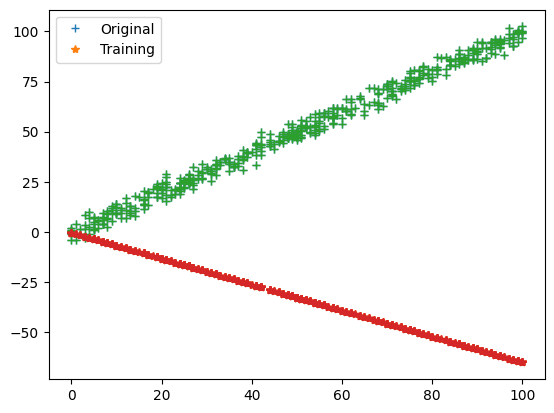

Iteration = 2, Loss = 1994.107990187235


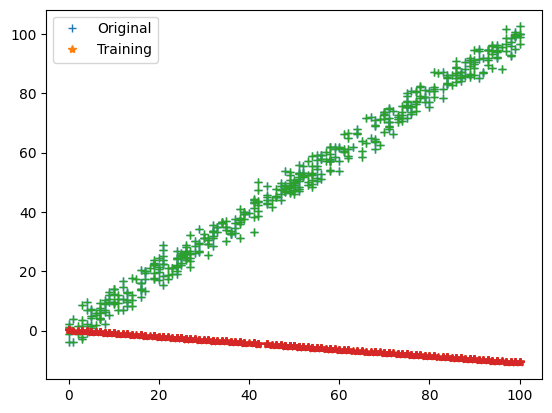

Iteration = 3, Loss = 893.9235501335986


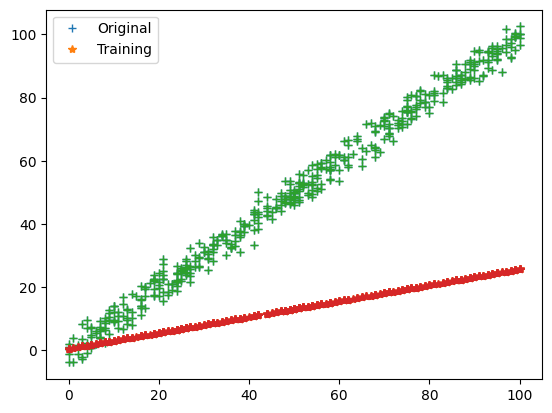

Iteration = 4, Loss = 401.9839188901768


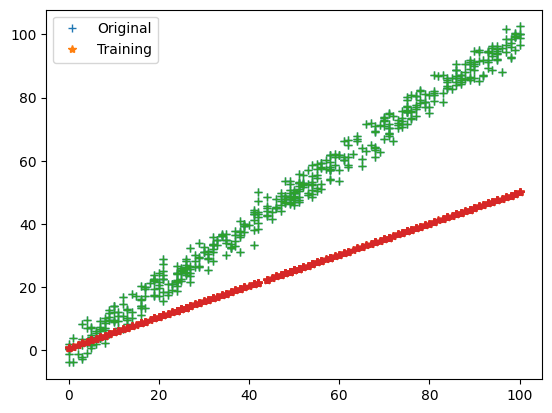

Iteration = 5, Loss = 182.02306550919502


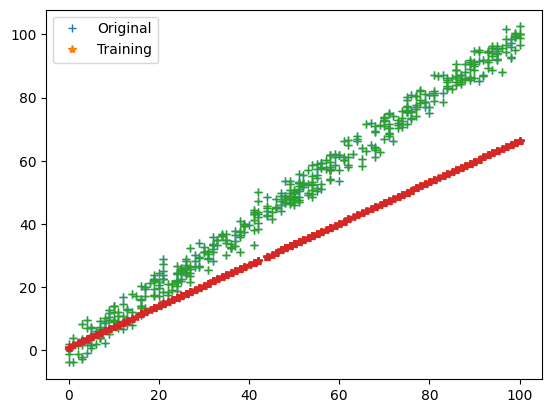

Iteration = 6, Loss = 83.67633124149384


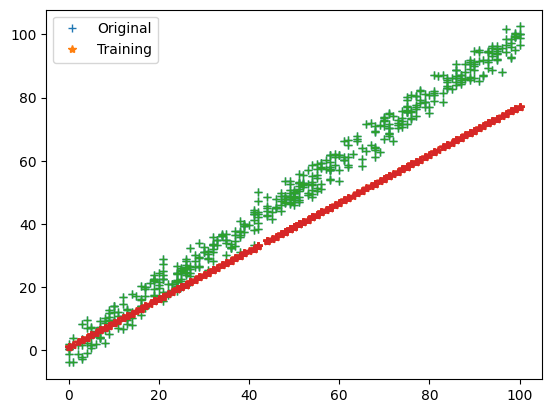

Iteration = 7, Loss = 39.70738944838701


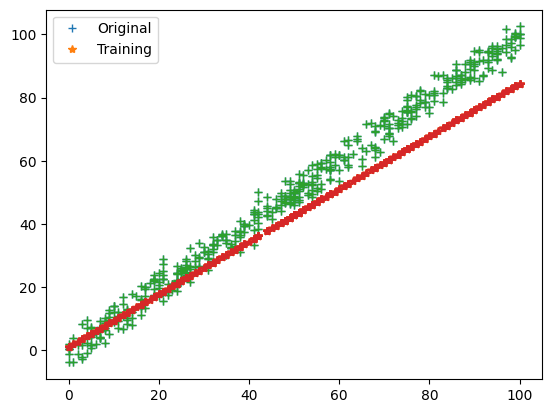

Iteration = 8, Loss = 20.05164571379558


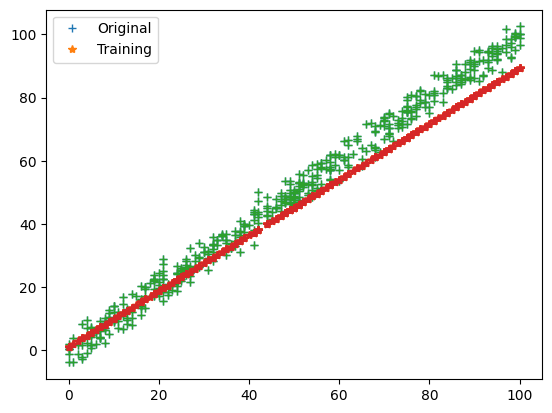

Iteration = 9, Loss = 11.266090731455009


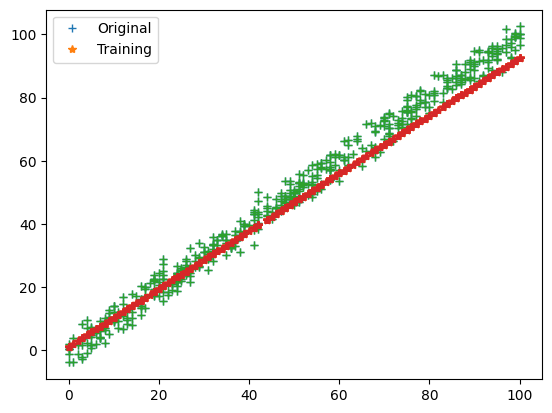

Iteration = 10, Loss = 7.340061738487489


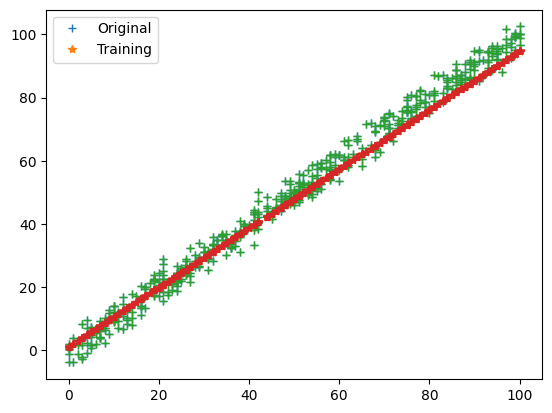

Iteration = 11, Loss = 5.586201767067611


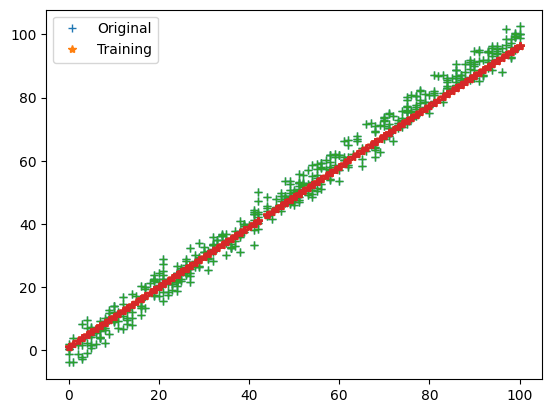

Iteration = 12, Loss = 4.803092774805664


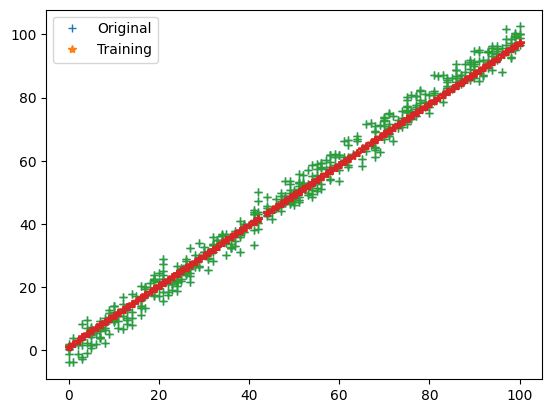

Iteration = 13, Loss = 4.453688418591031


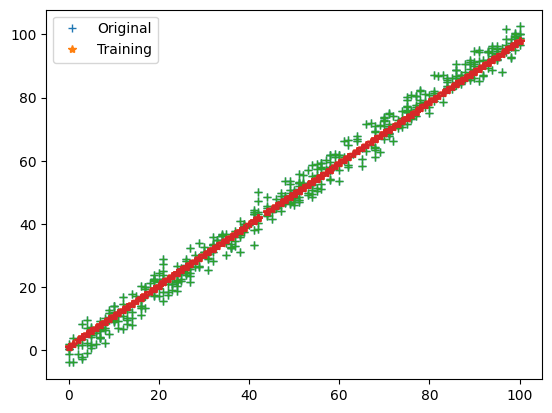

Iteration = 14, Loss = 4.297965737113707


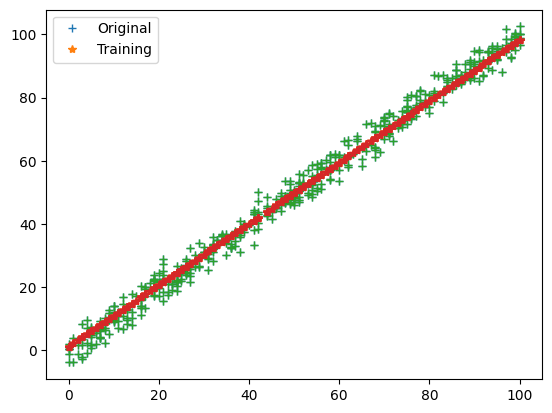

Iteration = 15, Loss = 4.228679210947974


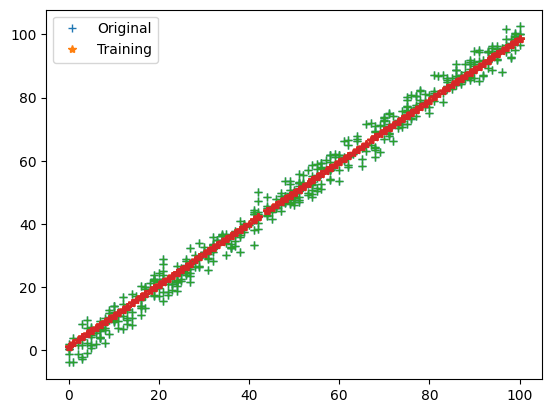

Iteration = 16, Loss = 4.19792903160626


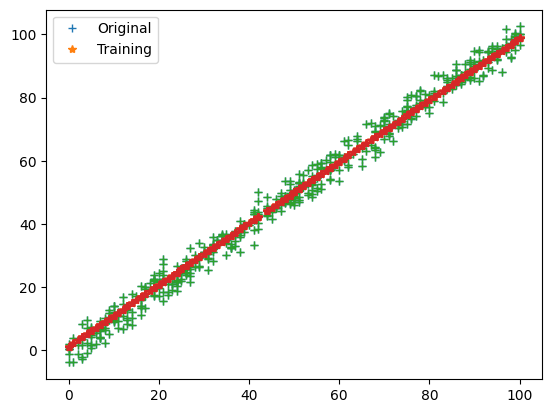

Iteration = 17, Loss = 4.184334055797199


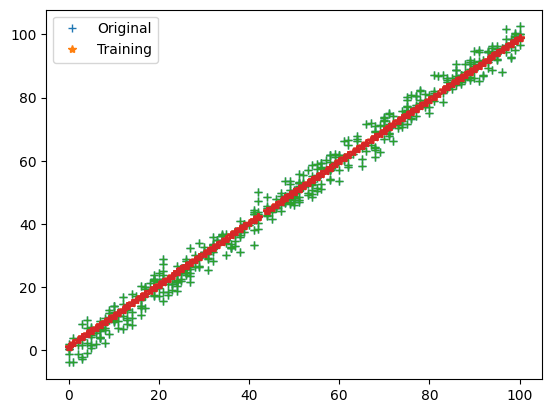

Iteration = 18, Loss = 4.178358824449979


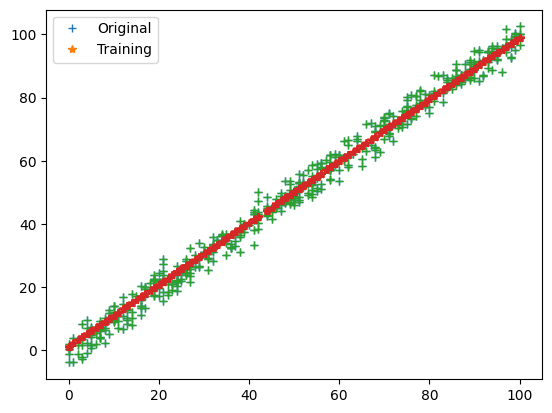

Iteration = 19, Loss = 4.175756446402629


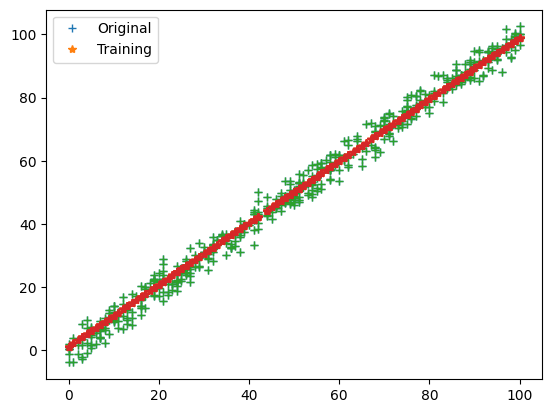

Iteration = 20, Loss = 4.174639259450999


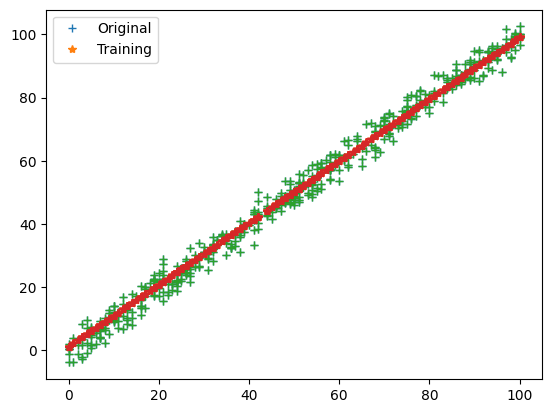

In [155]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss = 5289.133417230287


<Figure size 640x480 with 0 Axes>

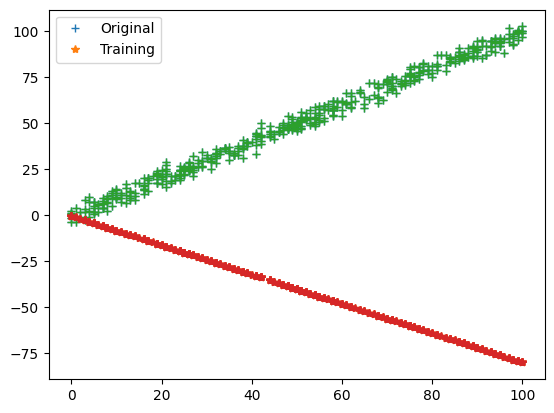

Iteration = 2, Loss = 576625620.1908083


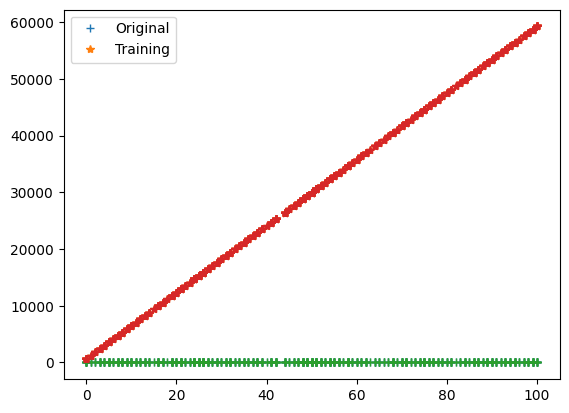

Iteration = 3, Loss = 62905984944844.08


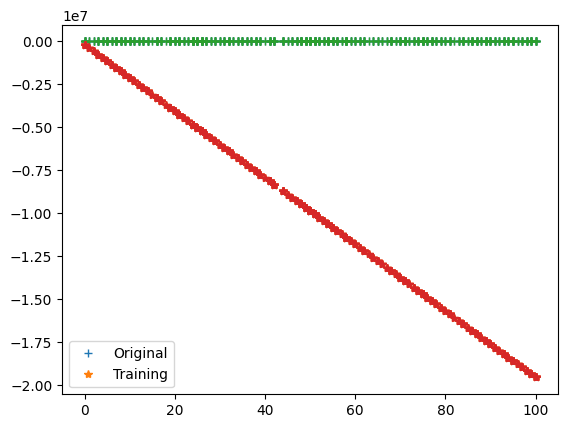

Iteration = 4, Loss = 6.862623617844103e+18


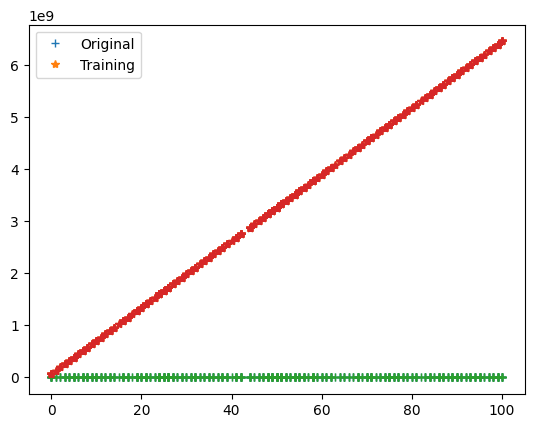

Iteration = 5, Loss = 7.486664886146577e+23


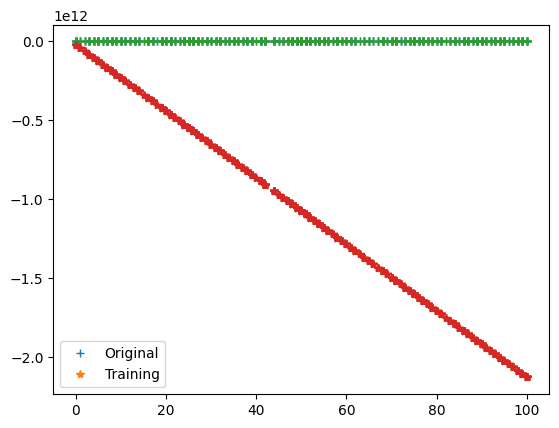

Iteration = 6, Loss = 8.167452309628455e+28


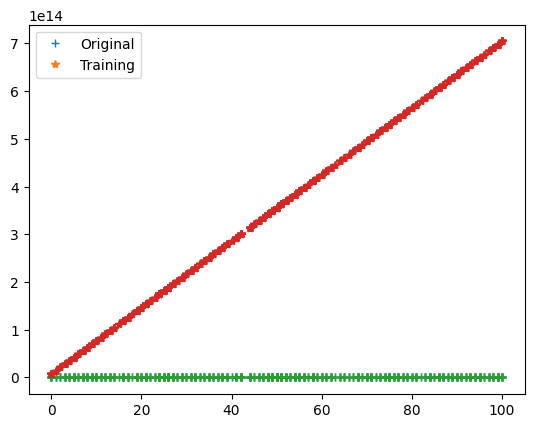

Iteration = 7, Loss = 8.910146005531848e+33


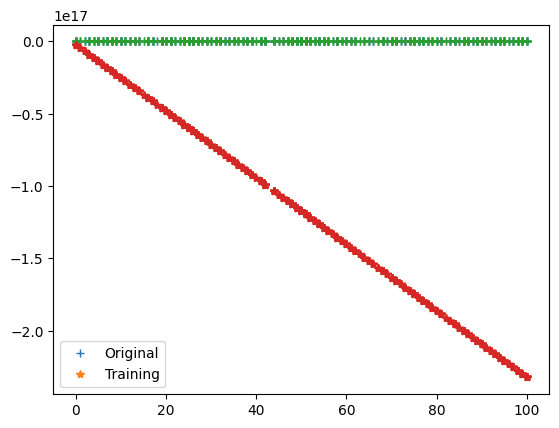

Iteration = 8, Loss = 9.720375317809067e+38


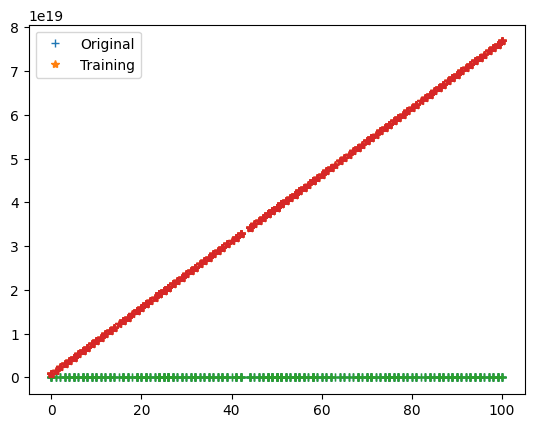

Iteration = 9, Loss = 1.0604281485444853e+44


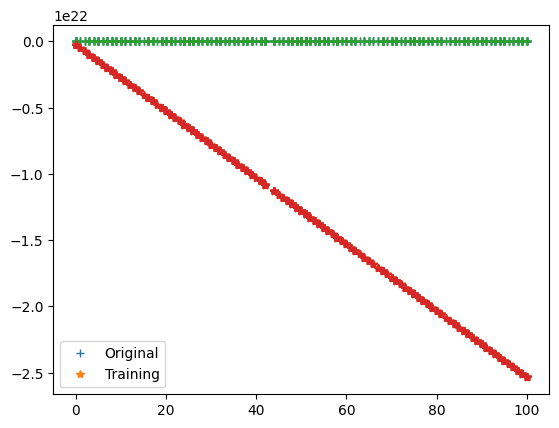

Iteration = 10, Loss = 1.1568564190780073e+49


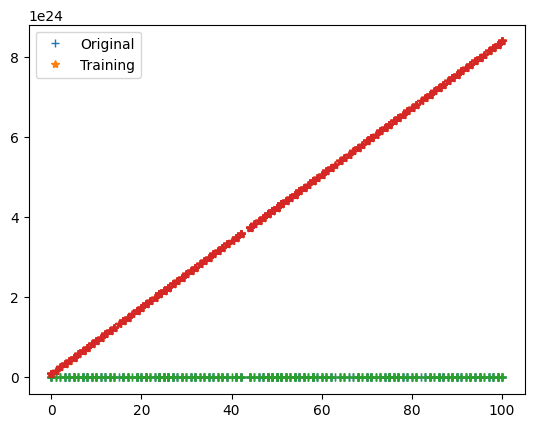

Iteration = 11, Loss = 1.262053234062984e+54


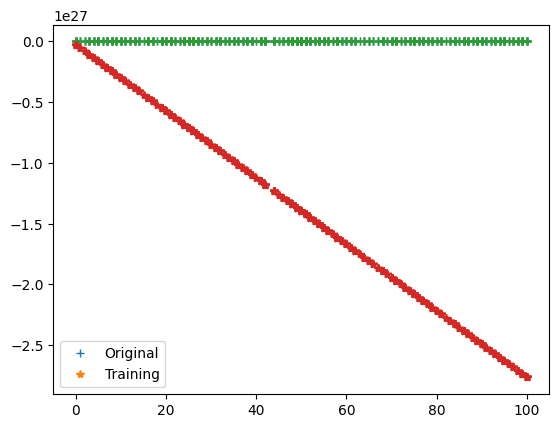

Iteration = 12, Loss = 1.3768159465098111e+59


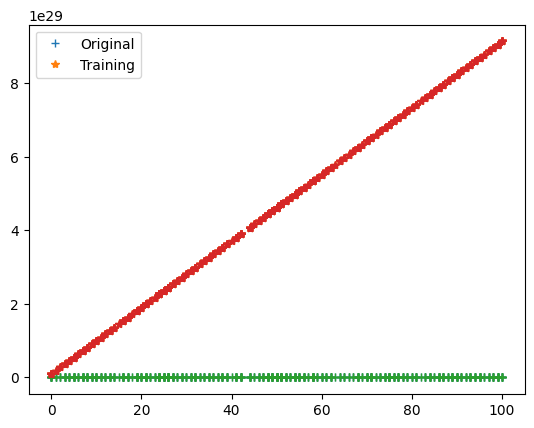

Iteration = 13, Loss = 1.5020144153991403e+64


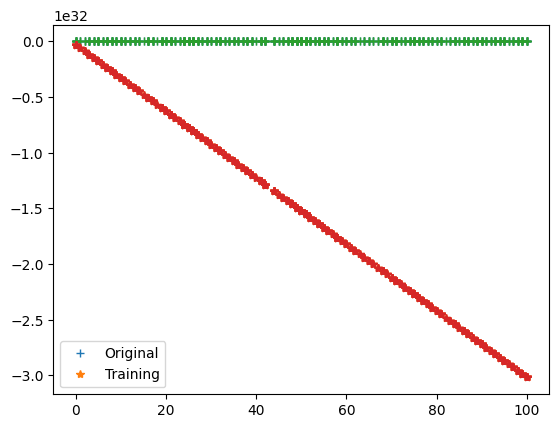

Iteration = 14, Loss = 1.6385975988917296e+69


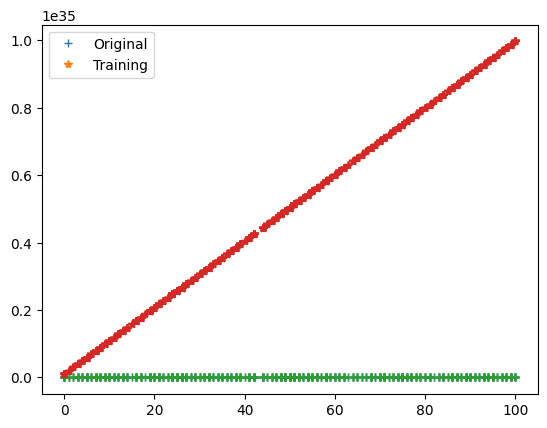

Iteration = 15, Loss = 1.7876007470808719e+74


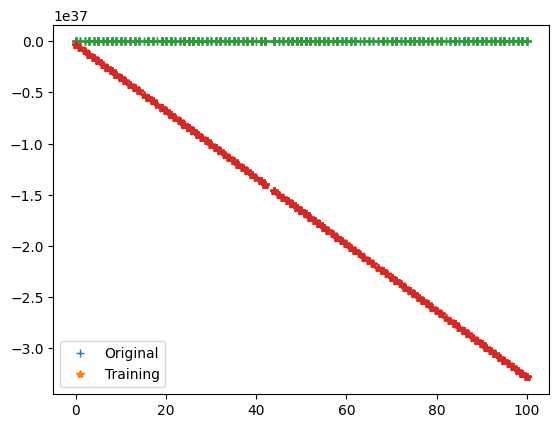

Iteration = 16, Loss = 1.9501532488058016e+79


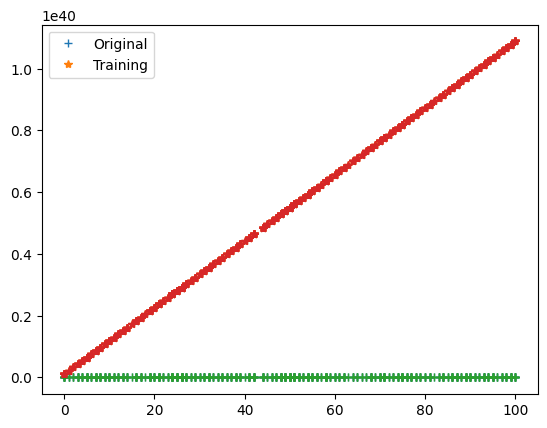

Iteration = 17, Loss = 2.1274871920020333e+84


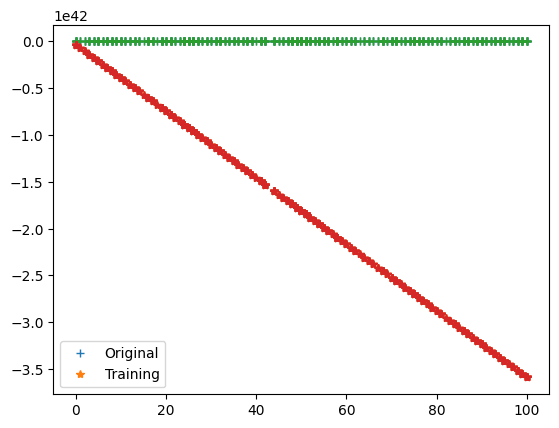

Iteration = 18, Loss = 2.3209467024729298e+89


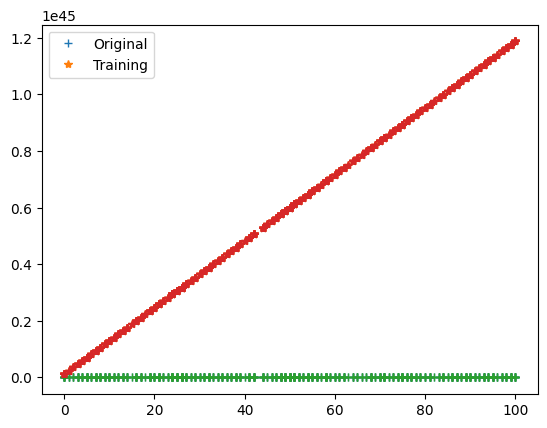

Iteration = 19, Loss = 2.5319981318669294e+94


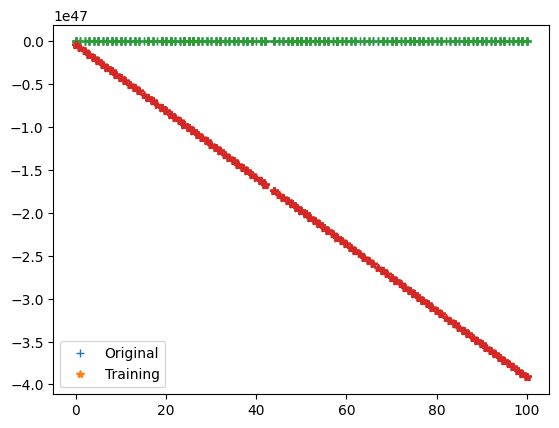

Iteration = 20, Loss = 2.762241172081545e+99


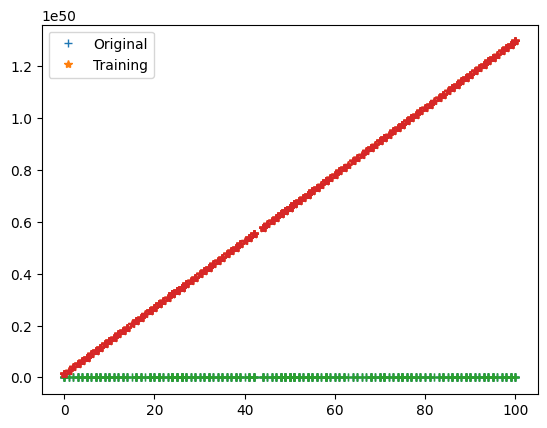

In [156]:
parameters, loss = train(train_input, train_output, 0.1, 20)
#0.1 is a learning rate which is much higher

In [157]:
print(parameters)

m
